### CASA0002_Urban simulation
# Random Graphs, Degree distribution and Small World
---

Valentina Marin 

March 2023

In [1]:
#importing the networkx library 
import networkx as nx 

#importing the matplotlib library for plotting the graph 
import matplotlib.pyplot as plt 

# 1. Random graphs

How to generate randomness in a network? 
We are going to have a look at two models today, the __Erdős–Rényi model__ and the __Barabási–Albert model__.

### Erdős-Rényi graph

We will create a $G(n, p)$ model where $n$ is the number of nodes and $p$ is the probability for a link between any two nodes


In [2]:
### nx.erdos_renyi_graph(n, p)
# Returns a $G_{n,p}$ random graph

### Parameters:
# n (int) – The number of nodes to be created
# p (float) – Probability for edge creation.

In [2]:
?nx.erdos_renyi_graph

Signature:
nx.erdos_renyi_graph(
    n,
    p,
    seed=None,
    directed=False,
    *,
    create_using=None,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a $G_{n,p}$ random graph, also known as an Erdős-Rényi graph
or a binomial graph.

The $G_{n,p}$ model chooses each of the possible edges with probability $p$.

Parameters
----------
n : int
    The number of nodes.
p : float
    Probability for edge creation.
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.
directed : bool, optional (default=False)
    If True, this function returns a directed graph.
create_using : Graph constructor, optional (default=nx.Graph or nx.DiGraph)
    Graph type to create. If graph instance, then cleared before populated.
    Multigraph types are not supported and raise a ``NetworkXError``.
    By default NetworkX Graph or DiGraph are used depending on `directed`.

See Also
--------
fast_gnp_random_gra

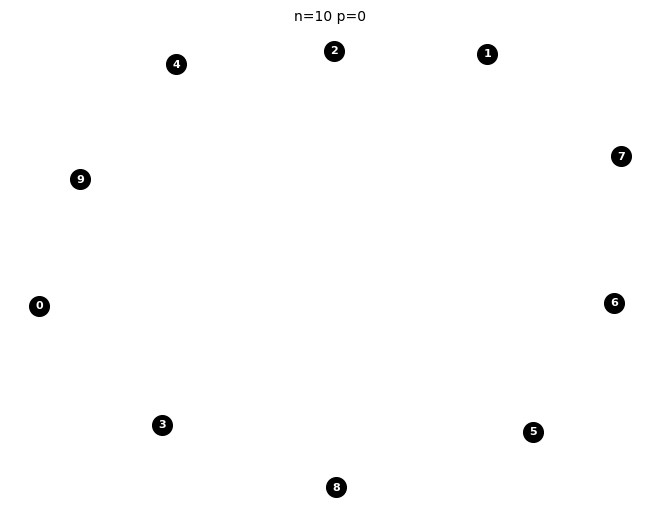

In [3]:
ER_1= nx.erdos_renyi_graph(10,0) 
# Here we are creating a graph with 10 nodes(n) and 0% probability (p) of any two nodes having an edge

nx.draw(ER_1, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=10 p=0",fontsize=10)
plt.show() 

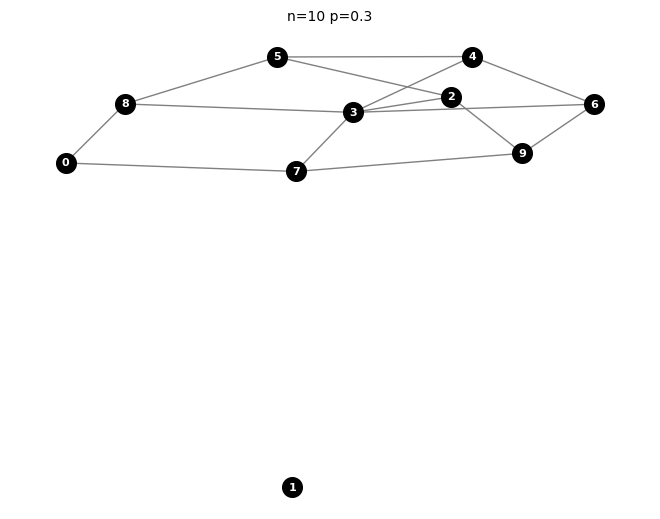

In [12]:
ER_2=nx.erdos_renyi_graph(10,0.3) 

# A graph with 10 nodes(n) and 30% probability (p) of any two nodes having an edge

nx.draw(ER_2, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=10 p=0.3",fontsize=10)
plt.show()

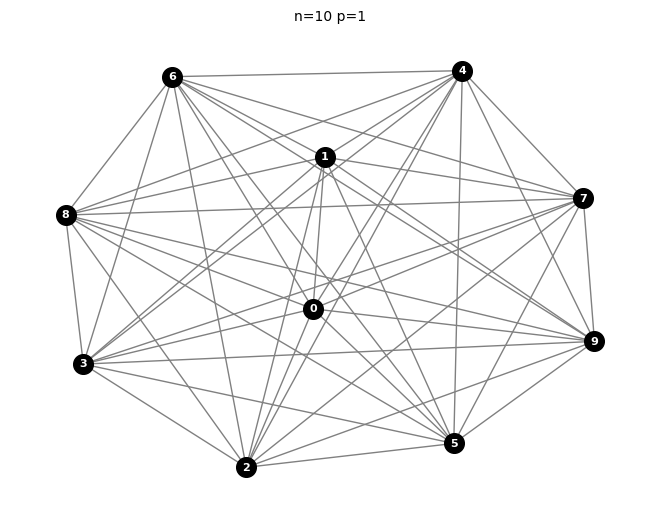

In [10]:
ER_3= nx.erdos_renyi_graph(10,1) 

# A graph with 10 nodes(n) and 100% probability (p) of any two nodes having an edge

nx.draw(ER_3, with_labels=True,       
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=10 p=1",fontsize=10)
plt.show() 

In [11]:
## The graph above is a fully connected network!!! 

__If we run a code with the same parameters many times, we will get different graphs with the same number of nodes and probability of having edges but most likely a different configuration.__

Let's try it! 

In the following code we have set the parameters having __10__ nodes (n) and the probability for creating edges of __25%__ (p).

In [13]:
## Here we use a for loop for iterating over the sequence of graph generation.
## We are creating 20 graphs using the same parameters.
## Let's see if they look the same !

ER_graphs = [nx.erdos_renyi_graph(10,0.25) for _ in range(20)]
len(ER_graphs)

20

In [14]:
ER_graphs # in this list we stored the 20 random graphs we have created

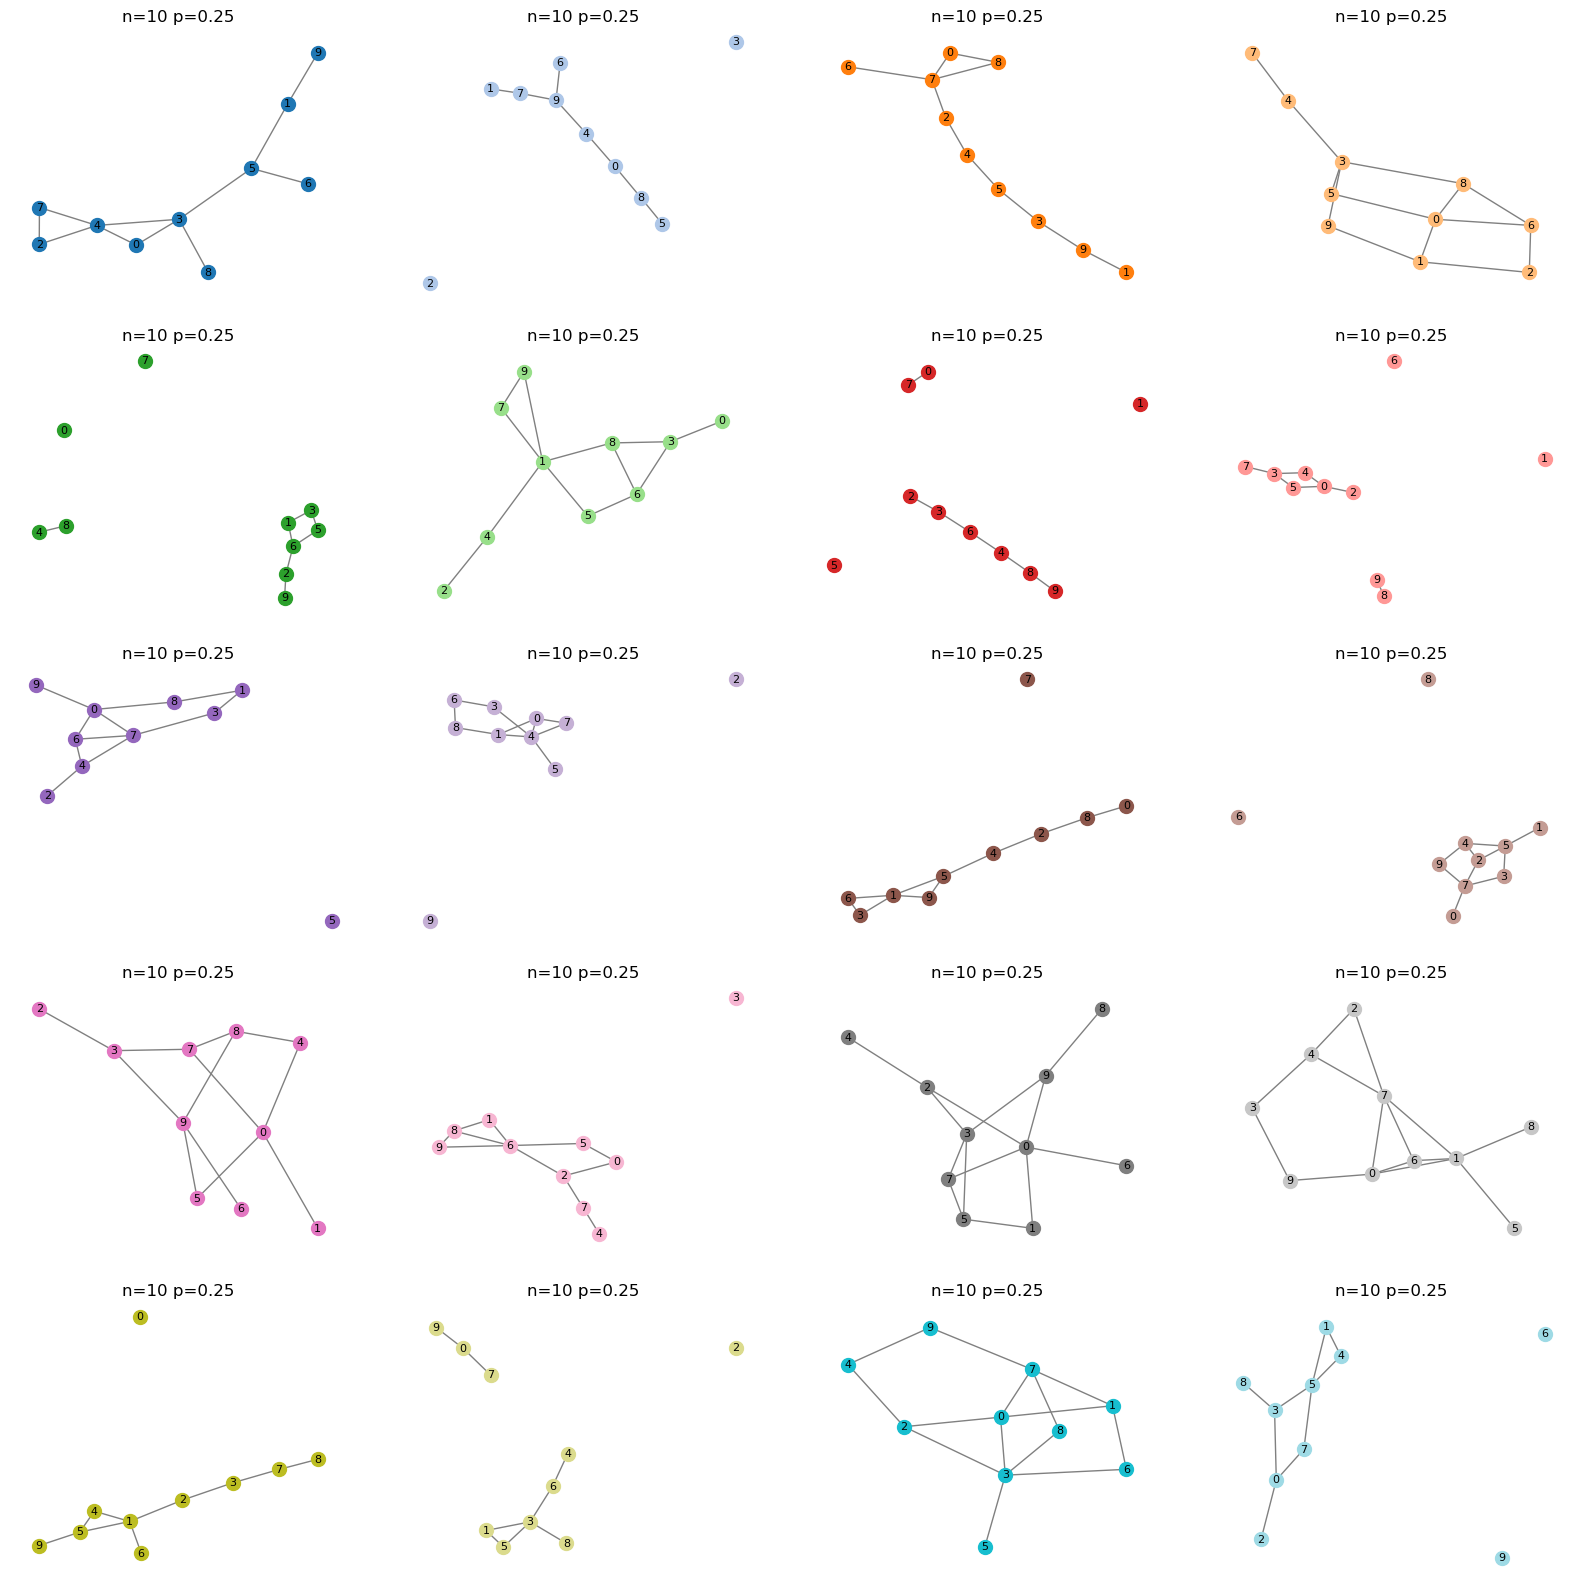

In [15]:
# The following code is just for visualisation purposes. We can plot all the graphs together:
import numpy as np

color={}
cm = plt.get_cmap("tab20")
for i in range(20):
    color[i]=cm(i/20)

fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
ax = axes.flatten()

for i in range(20):
    nx.draw_networkx(ER_graphs[i], ax=ax[i],
                     with_labels=True, 
                     node_size=100, 
                     font_size=8, 
                     font_color="k",
                     node_color=np.atleast_2d(color[i]),
                     edge_color='grey',
                     width=1)
    ax[i].set_axis_off()
    ax[i].set_title("n=10 p=0.25")

plt.show()




### Barabási–Albert model

We will create a graph with a total of $n$ nodes by preferentially attaching nodes each with $m$ edges to the nodes that have the higher degree $k_i$.

The probability of selecting node $i$ is defined by:  $\Pi_{i}= \frac {k_{i}}{\sum_{j}{k_{j}}}$



In [16]:
### nx.barabasi_albert_graph(n, m)
# Returns a random graph according to the Barabási–Albert preferential attachment model.

### Parameters:
# n (int) – The number of nodes to be created
# m (float) – Number of edges to attach from a new node to existing nodes
# When setting the parameters remember that 1 <= m < n

In [18]:
?nx.barabasi_albert_graph

Signature:
nx.barabasi_albert_graph(
    n,
    m,
    seed=None,
    initial_graph=None,
    *,
    create_using=None,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a random graph using Barabási–Albert preferential attachment

A graph of $n$ nodes is grown by attaching new nodes each with $m$
edges that are preferentially attached to existing nodes with high degree.

Parameters
----------
n : int
    Number of nodes
m : int
    Number of edges to attach from a new node to existing nodes
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.
initial_graph : Graph or None (default)
    Initial network for Barabási–Albert algorithm.
    It should be a connected graph for most use cases.
    A copy of `initial_graph` is used.
    If None, starts from a star graph on (m+1) nodes.
create_using : Graph constructor, optional (default=nx.Graph)
    Graph type to create. If graph instance, then clear

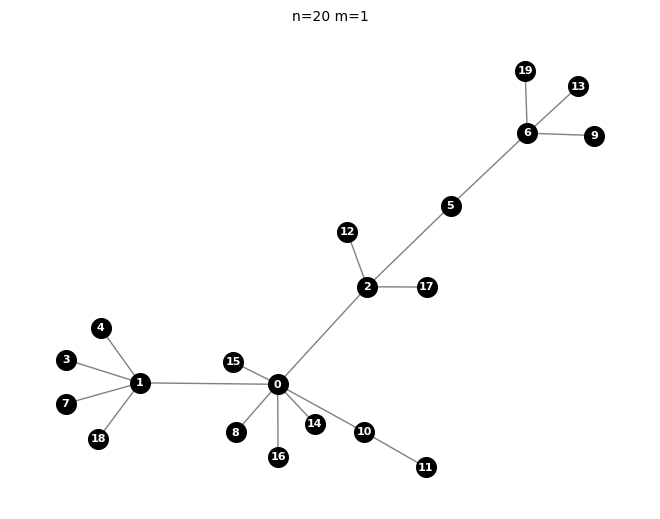

In [22]:
BA_1=nx.barabasi_albert_graph(20,1) 

# Here we are creating a graph with a total of 20 nodes(n) by attaching 1 edge (m) from a new node to existing nodes

nx.draw(BA_1, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=20 m=1",fontsize=10)
plt.show()

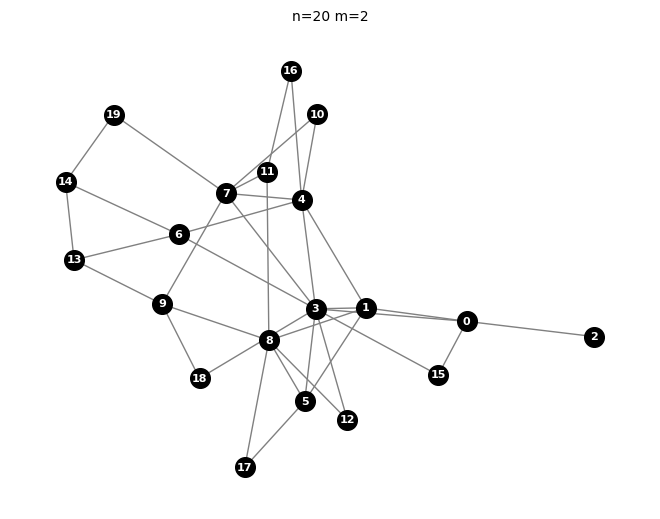

In [14]:
BA_2=nx.barabasi_albert_graph(20,2) 

# A graph with a total of 20 nodes(n) by attaching 2 edges (m) from a new node to existing nodes.

nx.draw(BA_2, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1)
plt.title("n=20 m=2",fontsize=10)
plt.show()

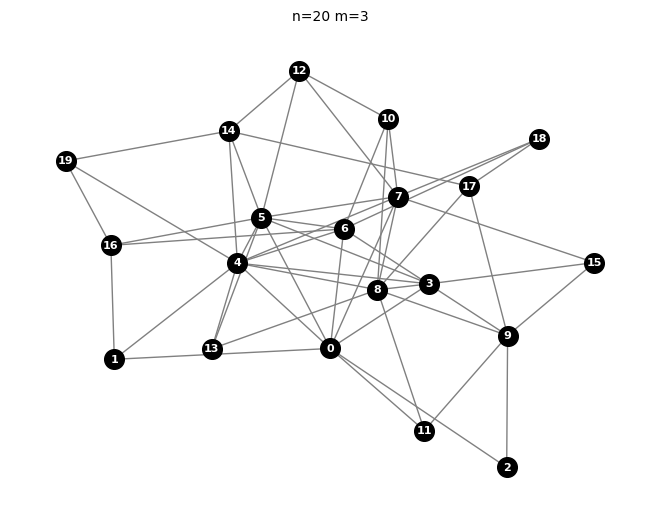

In [23]:
BA_3=nx.barabasi_albert_graph(20,3) 

# A graph with a total of 20 nodes(n) by attaching 3 edges (m) from a new node to existing nodes

nx.draw(BA_3, with_labels=True,
        node_size=200, 
        font_size=8, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='gray',
        width=1) 
plt.title("n=20 m=3",fontsize=10)
plt.show()

In [28]:
## Here we use a for loop for iterating over the sequence of graph generation.
## We are creating 20 graphs using the same parameters.
## Let's see if they look the same !

BA_graphs = [nx.barabasi_albert_graph(15,1) for _ in range(20)]

len(BA_graphs)

20

In [29]:
BA_graphs # in this list we stored the 20 random graphs we have created

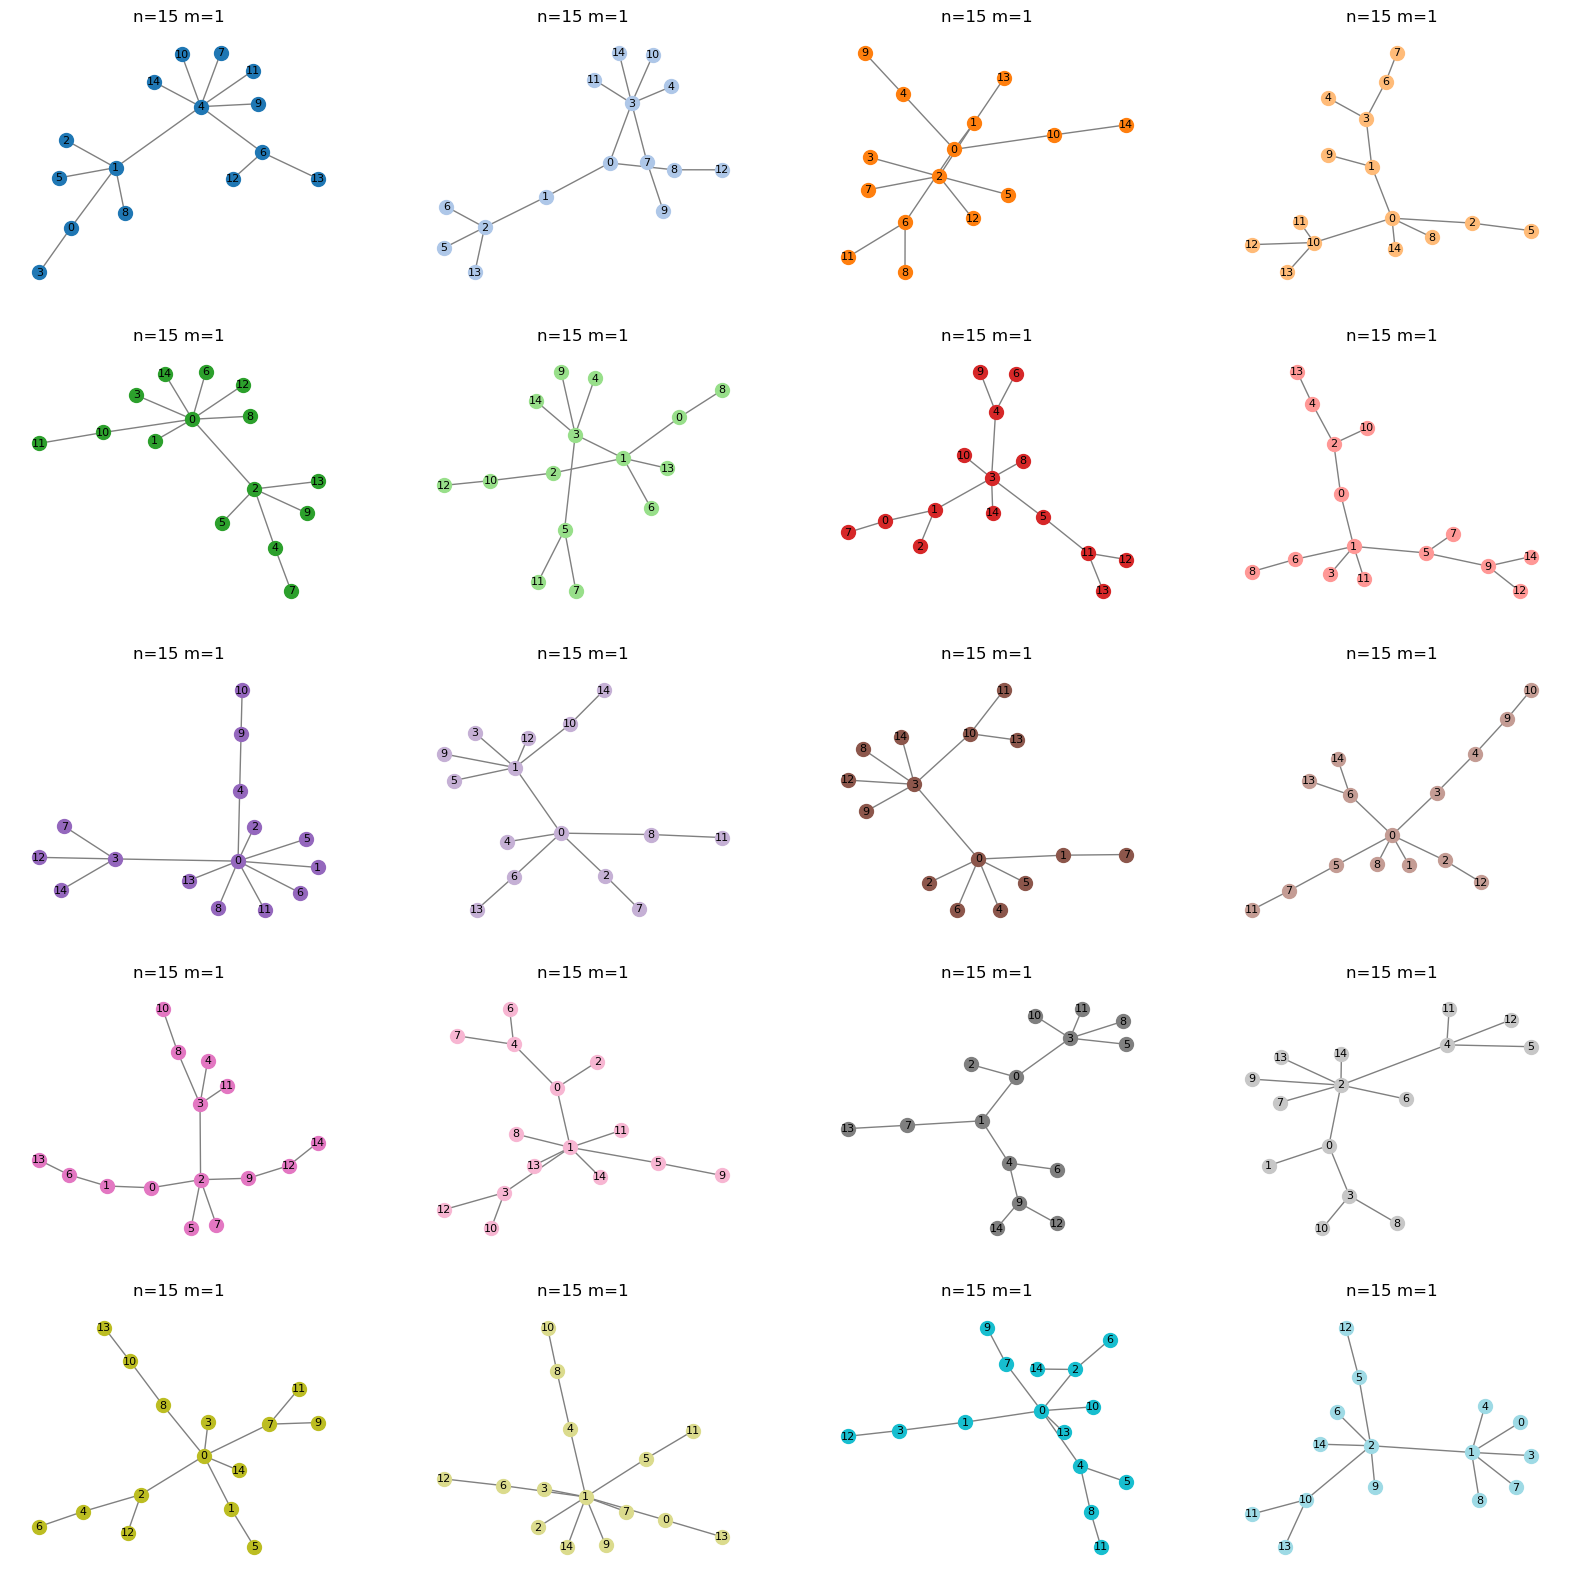

In [30]:
# The following code is just for visualisation purposes. We can plot all the graphs together:

color={}
cm = plt.get_cmap("tab20")
for i in range(20):
    color[i]=cm(i/20)


fig, axes = plt.subplots(nrows=5, ncols=4,figsize=(20,20))
ax = axes.flatten()


for i in range(20):
    nx.draw_networkx(BA_graphs[i], ax=ax[i],
                     with_labels=True, 
                     node_size=100, 
                     font_size=8, 
                     font_color="k",
                     node_color=np.atleast_2d(color[i]),
                     edge_color='grey',
                     width=1)
    ax[i].set_axis_off()
    ax[i].set_title("n=15 m=1")

plt.show()

In the figure above we can see that every graph created with the same parameters result in different configurations. 
However, we can see that in all of them there are few highly connected nodes.

# 2. Degree Distribution


__What is the shape of the degree distribution for our random graphs?__

In this section we will compute the degree distribution of the ramdom graph models and check if there is any difference between them.

For any $k$, $p(k)$ is the fraction of nodes having degree $k$.

$p(k)$  is then the probability that a randomly chosen node in the network has degree $k$. 


In [69]:
## Let's start by creating two random graphs using the models we just saw.

ER= nx.erdos_renyi_graph(100,0.10) 
ER.name="Erdős-Rényi graph" # Here we are naming the graph, so then when printing the graph info we can identify it 

BA= nx.barabasi_albert_graph(100,6) 
BA.name="Barabási–Albert graph"


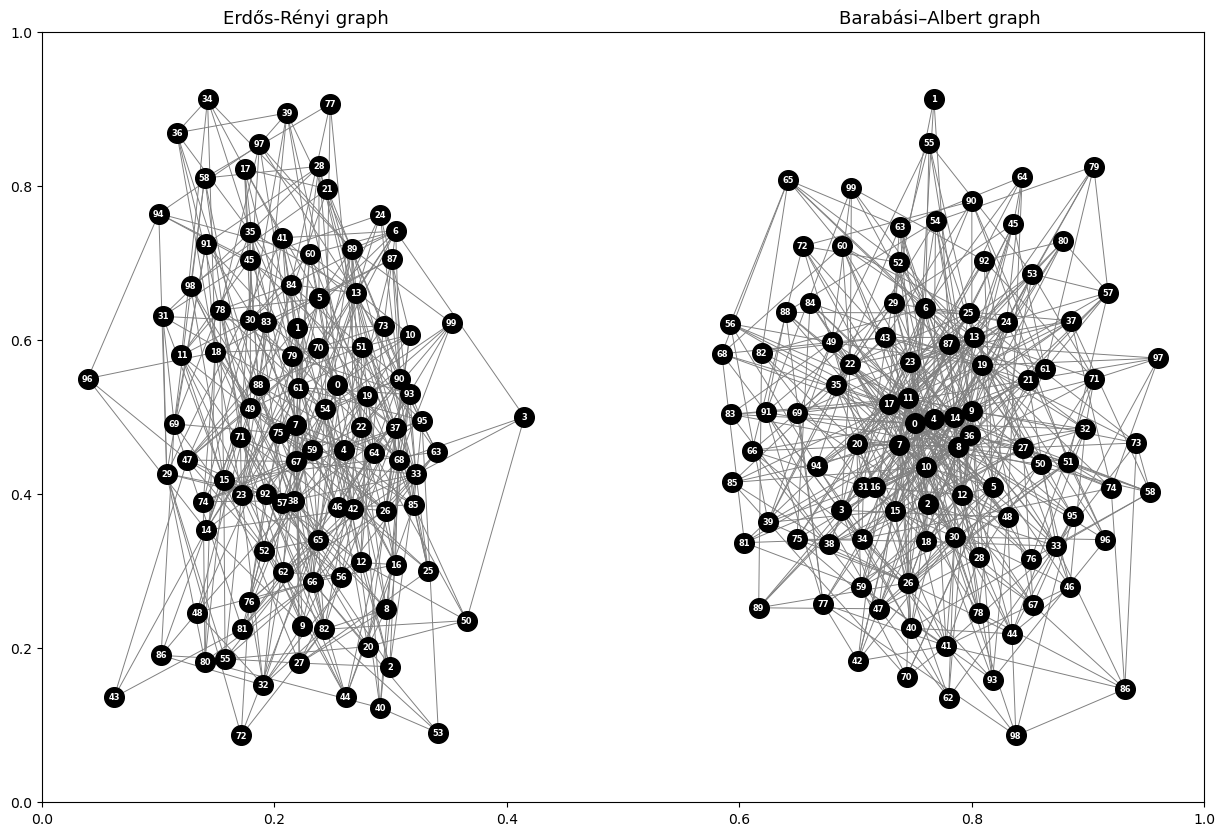

In [70]:
## Let's plot them now side by side:

fig, ax = plt.subplots(figsize=(15,10))

plt.subplot(1, 2, 1)  #this is just for plotting both graph together 
#this represents: (number of rows=1, number of columns=2, position of current plot= 1)

nx.draw(ER, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Erdős-Rényi graph",fontsize=13)



plt.subplot(1, 2, 2)
nx.draw(BA, 
        with_labels=True,
        node_size=200, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="k",
        edge_color='grey',
        width=0.7)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()

They look really similar !!!

Let's print the info for each graph to see if we can find any difference between them:

In [71]:
print(ER)
print(BA)

Graph named 'Erdős-Rényi graph' with 100 nodes and 439 edges
Graph named 'Barabási–Albert graph' with 100 nodes and 564 edges


Any suprise? We have same number of nodes, and similar number of edges and average degree !! 

Let's plot the graph using the degree of each node !

In [72]:
## To compute the degree of every node in both graphs:

# Degree of any node at the Erdős-Rényi graph:
degree_ER=nx.degree(ER)

nx.set_node_attributes(ER,dict(degree_ER),'deg')
ER_deg=[(i[1]['deg']) for i in ER.nodes(data=True)] # this only keeps the degree values which we will use for the color of nodes

# Degree of any node at the Barabási–Albert graph:
degree_BA=nx.degree(BA)

nx.set_node_attributes(BA,dict(degree_BA),'deg')
BA_deg=[(i[1]['deg']) for i in BA.nodes(data=True)]




In [73]:
ER_deg.sort(reverse=True)
ER_deg


[16,
 14,
 14,
 14,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 3]

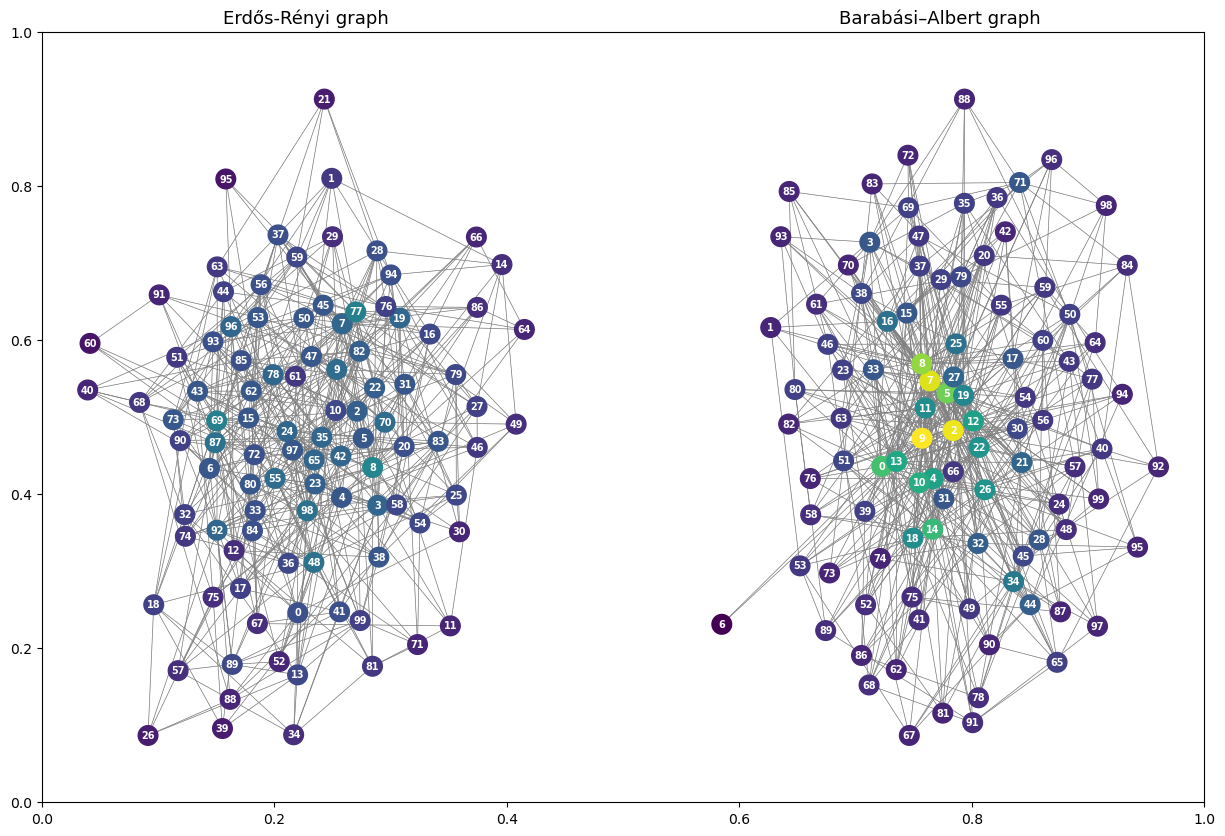

In [38]:
## To plot both graphs using the degree values for the colour of nodes:

fig, ax = plt.subplots(figsize=(15,10))


# Plot the Erdős-Rényi graph:

plt.subplot(1, 2, 1) # to plot the graphs side by side

pos_ER=nx.spring_layout(ER) # to set the possition of nodes 

nx.draw_networkx_edges(ER, 
                       pos_ER,edge_color='grey',
                       width=0.1)
nx.draw(ER, 
        pos=pos_ER,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=ER_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Erdős-Rényi graph",fontsize=13)



# Plot the Barabási–Albert graph:

plt.subplot(1, 2, 2)

pos_BA=nx.spring_layout(BA)

nx.draw_networkx_edges(BA, 
                       pos_BA,edge_color='grey',
                       width=0.1)
nx.draw(BA, 
        pos=pos_BA,
        with_labels=True,
        node_size=200, 
        font_size=7, 
        font_color="w",
        font_weight='bold',
        node_color=BA_deg,
        vmin=min(ER_deg+BA_deg),
        vmax=max(ER_deg+BA_deg),
        edge_color='gray',
        width=0.5)
plt.title("Barabási–Albert graph",fontsize=13)

plt.show()


## Here we are plotting both graphs using the same range of colour values. 
## We did this by setting the "vmin" and "vmax", taking the maximum and minimum values when looking at both degree lists.


In the __Erdős-Rényi graph__ we can see that most of the nodes have the similar number of links, with no highly connected nodes.

In the __Barabási–Albert graph__ we can see many nodes with low degree values and few hubs with large number of links.

To get a better view, we have to look at the degree distribution !!! 

In [46]:
# Using the degree we already computed at each node, we are going to figure out the probability of each degree in both graphs:

# Probability of degrees in the Erdős-Rényi graph:

degree_valuesER = sorted(set(ER_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityER = [round(list(ER_deg).count(i)/float(nx.number_of_nodes(ER)),4) for i in degree_valuesER]  # this give us the p(k) values

# Probability of degrees in the Barabási–Albert graph:

degree_valuesBA = sorted(set(BA_deg)) # this give us the k values. It selects the unique values of the degrees in the graph
probabilityBA = [round(list(BA_deg).count(i)/float(nx.number_of_nodes(BA)),4) for i in degree_valuesBA]# this give us the p(k) values


In [47]:
#Let's check how this looks like:
import pandas as pd
df_ER = pd.DataFrame({'k':degree_valuesER,'p(k)':probabilityER})
df_ER 

,k,p(k)
0,4,0.02
1,5,0.03
2,6,0.09
3,7,0.09
4,8,0.08
5,9,0.08
6,10,0.10
7,11,0.12
8,12,0.16
9,13,0.04


In [48]:
sum(df_ER['p(k)']) # the sum of every probability must be 1

1.0

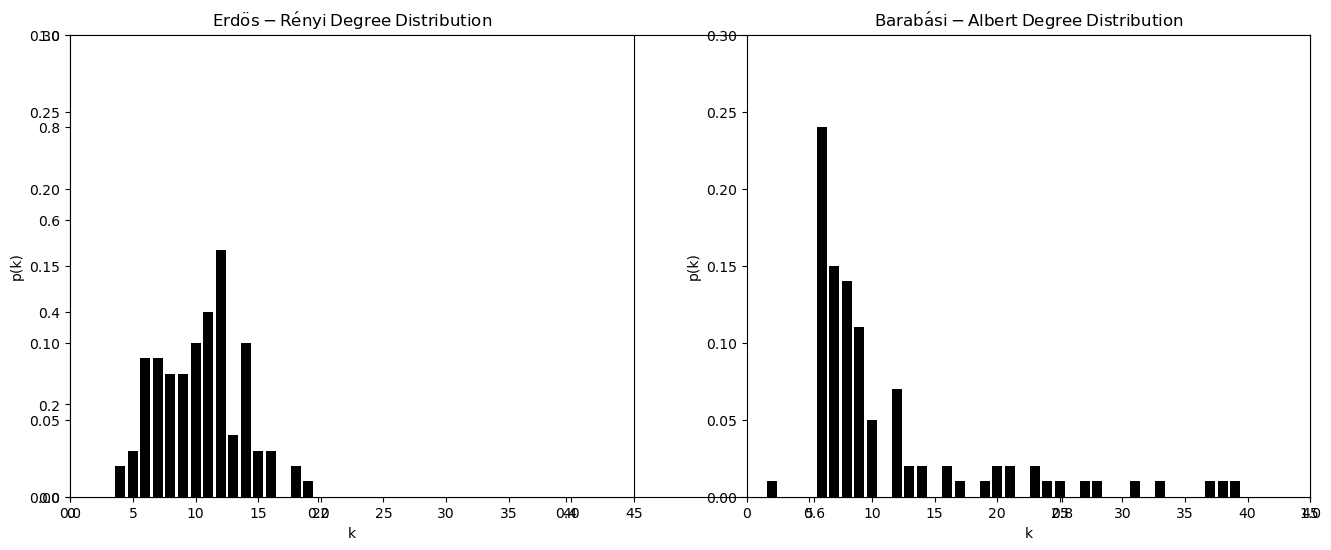

In [49]:
## Let's plot the degree distribution for each graph:

fig, ax = plt.subplots(figsize=(16,6))

#plot ER degree distribution:
plt.subplot(1, 2, 1)
plt.bar(degree_valuesER,probabilityER,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.ylim(0.00, 0.30)
plt.xlim(0, 45)
plt.title(r'$\mathrm{Erd\"os-R\'enyi\: Degree\: Distribution}$')

#plot BA degree distribution:
plt.subplot(1, 2, 2)
plt.bar(degree_valuesBA,probabilityBA,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.ylim(0.00, 0.30)
plt.xlim(0, 45)
plt.title(r'$\mathrm{Barab\'asi-Albert\: Degree\: Distribution}$')

plt.show()

By looking at the degree distribution we can see how the Erdős-Rényi graph tend towards a Poisson distribution, while the Barabási–Albert is more like a power-law distribution.


# 3. Random graphs and real networks

Now that we have seen two models of random graphs let's see how they compare to real networks by computing some measures.

We are going to use a Facebook network. You can download it from the [Stanford University](https://snap.stanford.edu/data/egonets-Facebook.html) site.

In [52]:
## Let's read the facebook network and create two random graphs with similar nodes and edges:

F = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
F.name="Facebook graph"
#(If it is too heavy to upload just replace this with the Karate Club network by using "nx.karate_club_graph()" and adjust the parameters of the following random graphs)

E_huge= nx.erdos_renyi_graph(4039,0.01) 
E_huge.name="Erdős-Rényi graph"

B_huge= nx.barabasi_albert_graph(4039,22) 
B_huge.name="Barabási–Albert graph"


print(F)
print(E_huge)
print(B_huge)

Graph named 'Facebook graph' with 4039 nodes and 88234 edges
Graph named 'Erdős-Rényi graph' with 4039 nodes and 81076 edges
Graph named 'Barabási–Albert graph' with 4039 nodes and 88374 edges


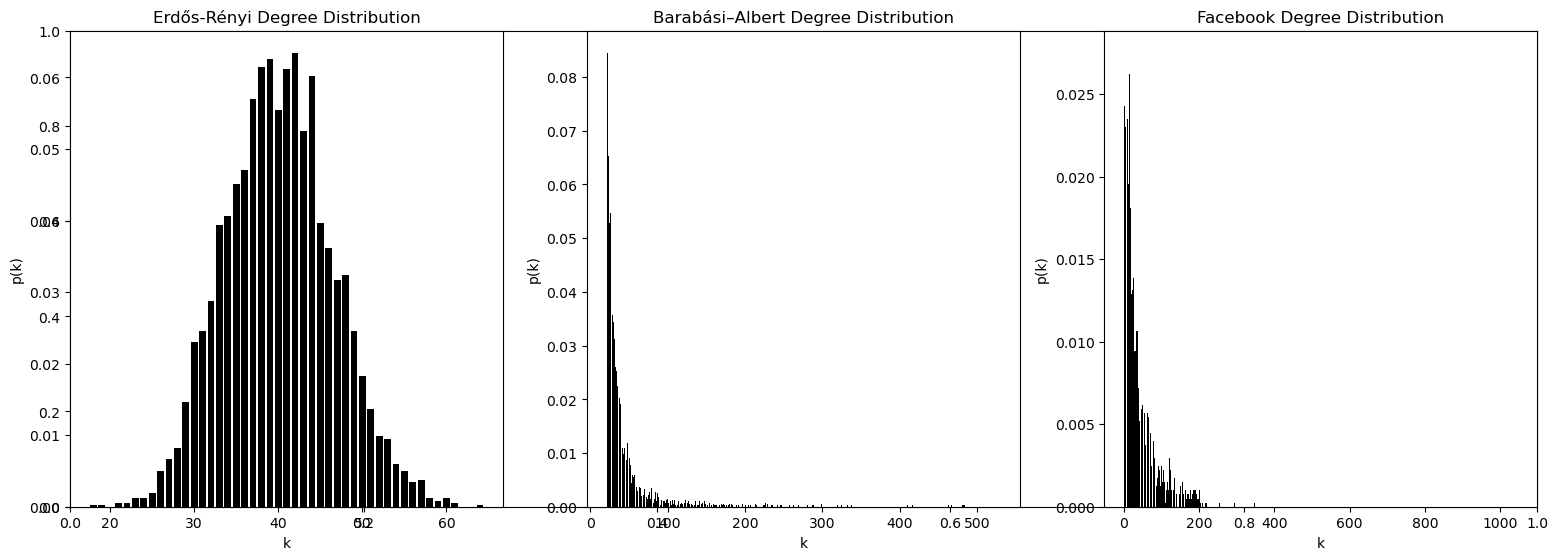

In [53]:
### Let's start by computing the degree for each graph:

degree_F=nx.degree(F)
nx.set_node_attributes(F,dict(degree_F),'deg')
F_deg=[(i[1]['deg']) for i in F.nodes(data=True)]

degree_E_huge=nx.degree(E_huge)
nx.set_node_attributes(E_huge,dict(degree_E_huge),'deg')
E_huge_deg=[(i[1]['deg']) for i in E_huge.nodes(data=True)]

degree_B_huge=nx.degree(B_huge)
nx.set_node_attributes(B_huge,dict(degree_B_huge),'deg')
B_huge_deg=[(i[1]['deg']) for i in B_huge.nodes(data=True)]


### Let's find the k and p(k):

degree_valuesE_huge = sorted(set(E_huge_deg)) # k
probabilityE_huge = [list(E_huge_deg).count(i)/float(nx.number_of_nodes(E_huge)) for i in degree_valuesE_huge] #p(k)

degree_valuesB_huge = sorted(set(B_huge_deg)) # k
probabilityB_huge = [list(B_huge_deg).count(i)/float(nx.number_of_nodes(B_huge)) for i in degree_valuesB_huge] #p(k)

degree_valuesF = sorted(set(F_deg)) # k
probabilityF = [list(F_deg).count(i)/float(nx.number_of_nodes(F)) for i in degree_valuesF] #p(k)



### To plot the three degree distribution together:

fig, ax = plt.subplots(figsize=(16,6))

#plot ER:
plt.subplot(1, 3, 1)
plt.bar(degree_valuesE_huge,probabilityE_huge,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Erdős-Rényi Degree Distribution')

#plot BA:
plt.subplot(1, 3, 2)
plt.bar(degree_valuesB_huge,probabilityB_huge,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')

plt.title('Barabási–Albert Degree Distribution')

#plot F:
plt.subplot(1, 3, 3)
plt.bar(degree_valuesF,probabilityF,color="k")
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Facebook Degree Distribution')

plt.tight_layout()
plt.show()


Let's compute the clustering coefficient at each network

In [54]:
#Average clustering coefficient (C):
clus_ER = nx.average_clustering(E_huge)
clus_BA = nx.average_clustering(B_huge)
clus_F = nx.average_clustering(F)

clus=[clus_ER,clus_BA,clus_F]

#Number of nodes (N):
nodes_ER= E_huge.number_of_nodes()  
nodes_BA= B_huge.number_of_nodes()  
nodes_F= F.number_of_nodes()  

nodes=[nodes_ER,nodes_BA,nodes_F]

#Number of edges (L):
edges_ER= E_huge.number_of_edges()  
edges_BA= B_huge.number_of_edges()  
edges_F= F.number_of_edges()  

edges=[edges_ER,edges_BA,edges_F]

#Average degree <k>:
from statistics import mean

av_deg_ER= mean(E_huge_deg) 
av_deg_BA= mean(B_huge_deg) 
av_deg_F= mean(F_deg)

av_deg=[av_deg_ER,av_deg_BA,av_deg_F]

name=['Erdős-Rényi','Barabási–Albert', 'Facebook']

In [55]:
df_all = pd.DataFrame({'Networks':name,'N':nodes,'L':edges,'<k>':av_deg,'C':clus})
df_all

,Networks,N,L,<k>,C
0,Erdős-Rényi,4039,81076,40.146571,0.009942
1,Barabási–Albert,4039,88374,43.760337,0.038264
2,Facebook,4039,88234,43.691013,0.605547


We can see that real networks have a much higher clustering coefficient than random networks of similar N and L

In [57]:
##### IMPORTANT !

# when we work with random graphs we need to run many different samples and use the average properties.
# In the previous case we didn't do it for time processing reasons.
# We should have done something like this for computing the average clustering coefficient of the BA model:

G = [nx.barabasi_albert_graph(4039,22)  for _ in range(10)] # Here we are only running this 10 times, but you should do it many more
C = [nx.average_clustering(i) for i in G]

C

## This is going to take some time....

[0.03663378997272119,
 0.03715997569646739,
 0.03765649654386162,
 0.03776523754895935,
 0.03765000339803938,
 0.03816296886873465,
 0.03660855331152649,
 0.03684541048010546,
 0.037441625168811554,
 0.03825941797869804]

In [58]:
CC=sum(C)/len(C) # we should have used this value !

# 4. Small world

## Watts Strogatz model

We will now produce graphs with small-world properties by using the Watts-Strogatz model.

In [59]:
? nx.watts_strogatz_graph

Signature:
 nx.watts_strogatz_graph(
    n,
    k,
    p,
    seed=None,
    *,
    create_using=None,
    backend=None,
    **backend_kwargs,
)
Docstring:
Returns a Watts–Strogatz small-world graph.

Parameters
----------
n : int
    The number of nodes
k : int
    Each node is joined with its `k` nearest neighbors in a ring
    topology.
p : float
    The probability of rewiring each edge
seed : integer, random_state, or None (default)
    Indicator of random number generation state.
    See :ref:`Randomness<randomness>`.
create_using : Graph constructor, optional (default=nx.Graph)
    Graph type to create. If graph instance, then cleared before populated.
    Multigraph and directed types are not supported and raise a ``NetworkXError``.

See Also
--------
newman_watts_strogatz_graph
connected_watts_strogatz_graph

Notes
-----
First create a ring over $n$ nodes [1]_.  Then each node in the ring is joined
to its $k$ nearest neighbors (or $k - 1$ neighbors if $k$ is odd).
Then shortcu

In [60]:
### nx.nx.watts_strogatz_graph(n, k, p)
# Returns a Watts–Strogatz small-world graph.

### Parameters:
# n (int) – The number of nodes to be created
# k (int) – Each node is joined with its 'k' nearest neighbors in a ring topology.
# p (float) – The probability of rewiring each edge

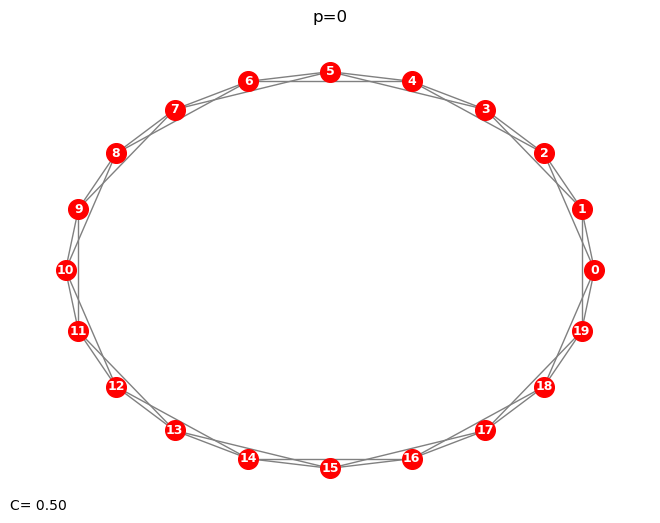

In [61]:
WS_1=nx.watts_strogatz_graph(20, 4,0)

# Here we are creating a graph with a rewire probability of 0. The original graph is unchanged


C_1=nx.average_clustering(WS_1)


pos=nx.circular_layout(WS_1)

nx.draw(WS_1, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0')
plt.figtext(0,0,'C= %.2f'%(C_1))



plt.show()

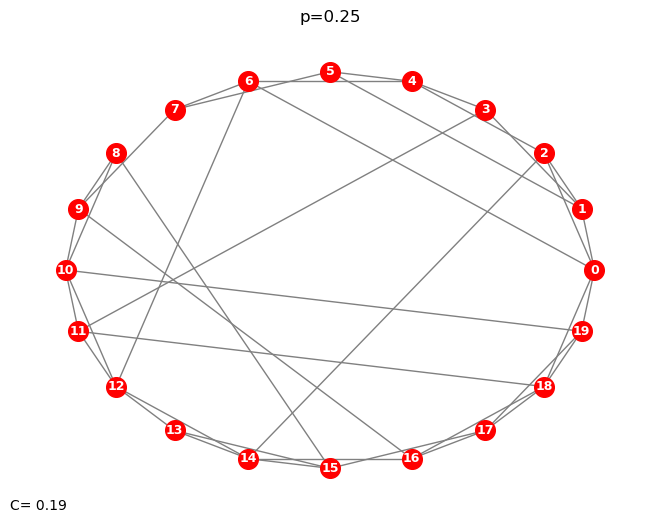

In [62]:
WS_2=nx.watts_strogatz_graph(20, 4,0.25)

# A graph with a rewire probability of 0.25

pos=nx.circular_layout(WS_2)

C_2=nx.average_clustering(WS_2)

nx.draw(WS_2, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0.25')
plt.figtext(0,0,'C= %.2f'%(C_2))
plt.show()

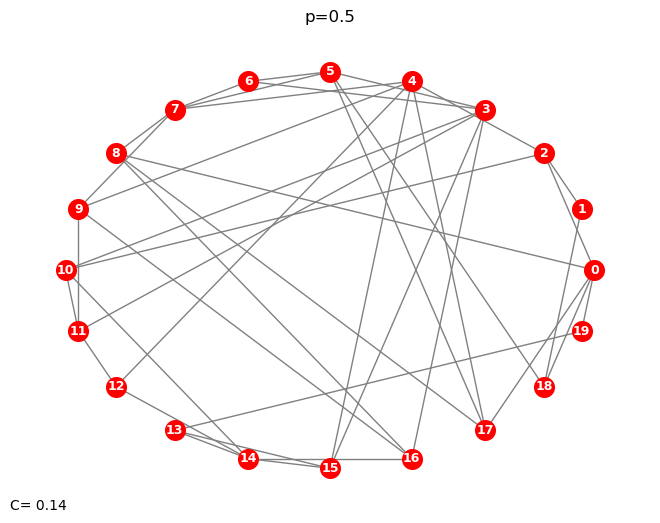

In [44]:
WS_3=nx.watts_strogatz_graph(20, 4,0.5)

# A graph with a rewire probability of 0.5

C_3=nx.average_clustering(WS_3)

pos=nx.circular_layout(WS_3)

nx.draw(WS_3, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=0.5')
plt.figtext(0,0,'C= %.2f'%(C_3))
plt.show()

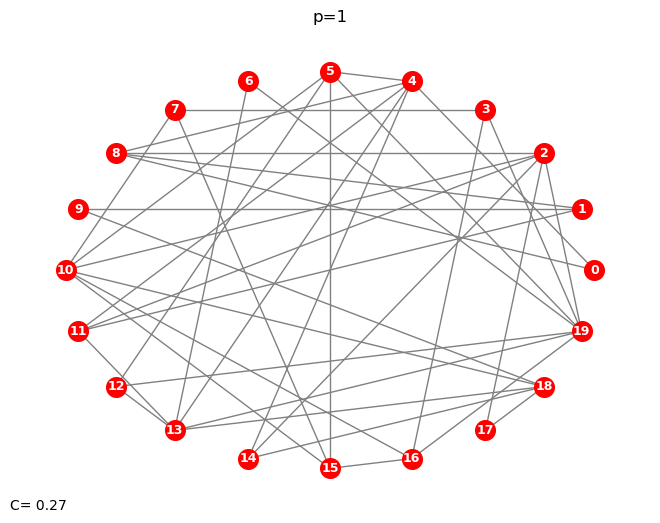

In [63]:
WS_4=nx.watts_strogatz_graph(20, 4, 1)

# A graph with a rewire probability of 1. All edges are rewired randomly.

pos=nx.circular_layout(WS_4)

C_4=nx.average_clustering(WS_4)

nx.draw(WS_4, 
        pos=pos,
        with_labels=True,
        node_size=200, 
        font_size=9, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='gray',
        width=1) 
plt.title('p=1')
plt.figtext(0,0,'C= %.2f'%(C_4))
plt.show()

Let's see how different graphs compare in terms of __clustering coefficient__ and __average shortest paths__.

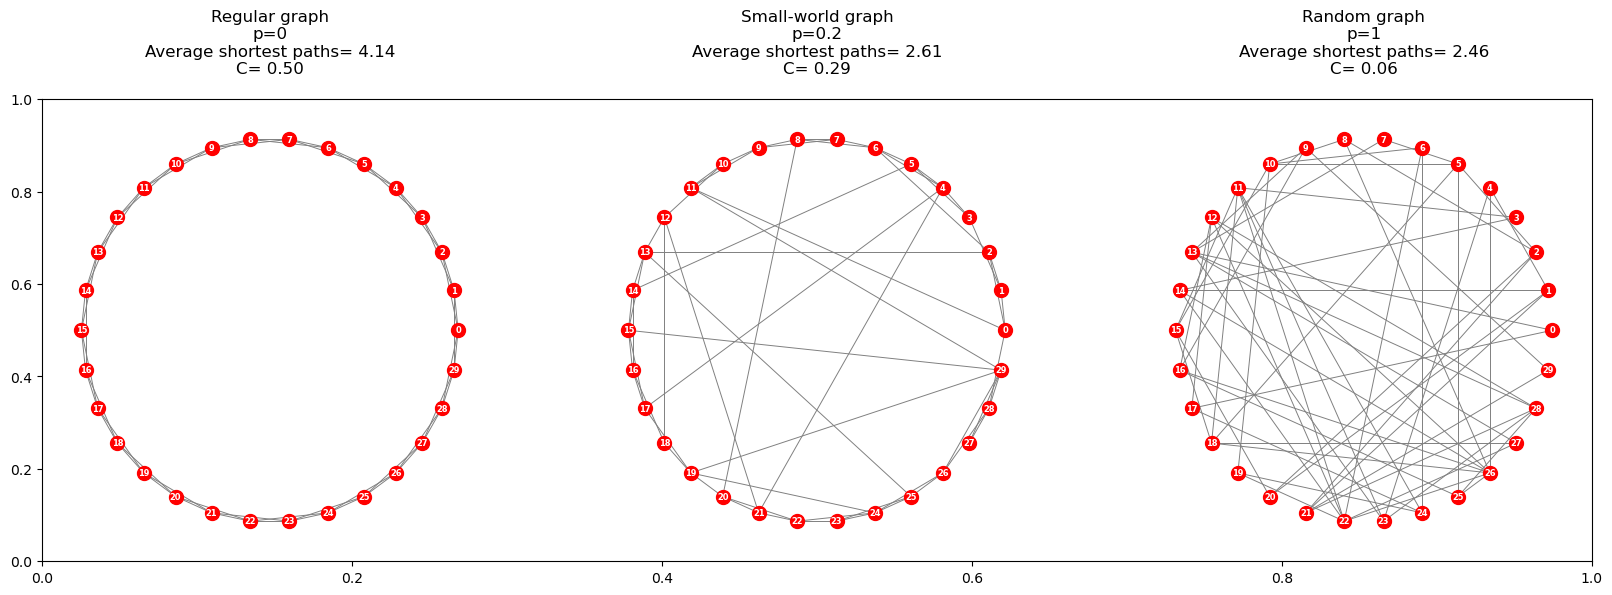

In [64]:
###### Let's start by creating the graphs and computing both measures:


#Graph 1:
WS_a=nx.watts_strogatz_graph(30, 4, 0)

WS_a_sp=nx.average_shortest_path_length(WS_a)
WS_a_c=nx.average_clustering(WS_a)


#Graph 2:
WS_b=nx.watts_strogatz_graph(30, 4, 0.2)

WS_b_sp=nx.average_shortest_path_length(WS_b)
WS_b_c=nx.average_clustering(WS_b)


#Graph 3:
WS_c=nx.watts_strogatz_graph(30, 4, 1)

WS_c_sp=nx.average_shortest_path_length(WS_c)
WS_c_c=nx.average_clustering(WS_c)


###### Let's plot the graph with the measures we computed:
fig, ax = plt.subplots(figsize=(20,6))

pos=nx.circular_layout(WS_a)

plt.subplot(1, 3, 1) 
nx.draw(WS_a, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Regular graph\np=0\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_a_sp, WS_a_c))

plt.subplot(1, 3, 2)
nx.draw(WS_b, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Small-world graph\np=0.2\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_b_sp, WS_b_c))

plt.subplot(1, 3, 3)
nx.draw(WS_c, 
        pos=pos,
        with_labels=True,
        node_size=100, 
        font_size=6, 
        font_color="w",
        font_weight='bold',
        node_color="r",
        edge_color='grey',
        width=0.7)
plt.title('Random graph\np=1\nAverage shortest paths= %.2f\nC= %.2f\n'%(WS_c_sp, WS_c_c))

plt.show()

Here we can see that the __Small-world graph__ has larger clustering coefficient than the __Random graph__ and lower average shortest paths than __Regular graphs__.

__QUICK Exercise!__

Use the Tube network from the previous practicals and create an Erdős-Rényi and Barabási–Albert graph with the same number of elements. Compare the 3 graphs based on their degree distribution and reflect on the outputs.